In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

file = pd.read_csv('.\\Resources\\train.csv')

train = DataFrame(file)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Analysis

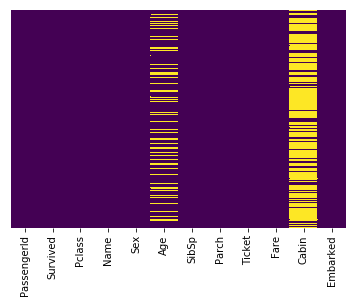

In [3]:
#Check for null values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

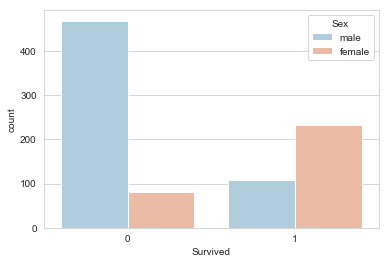

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

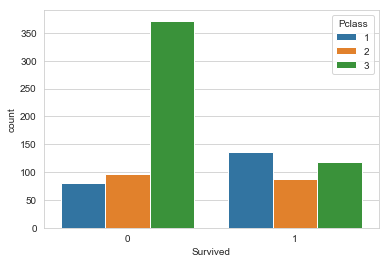

In [5]:
sns.countplot(x='Survived',hue='Pclass',data=train)

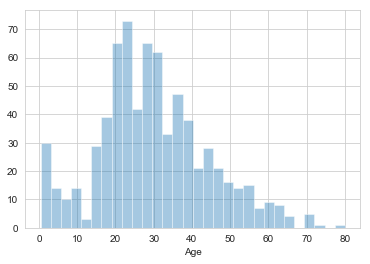

In [6]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


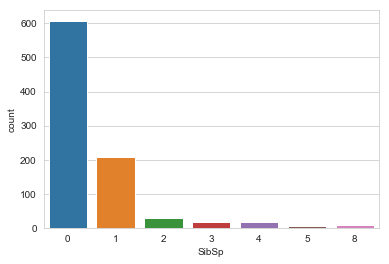

In [8]:
sns.countplot(x='SibSp',data=train)

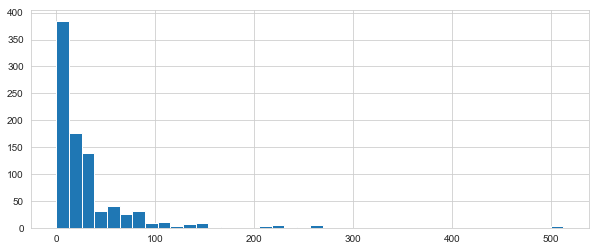

In [9]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [10]:
# import cufflinks as cf
# cf.go_offline()
# train['Fare'].iplot(kind='hist',bins=50)

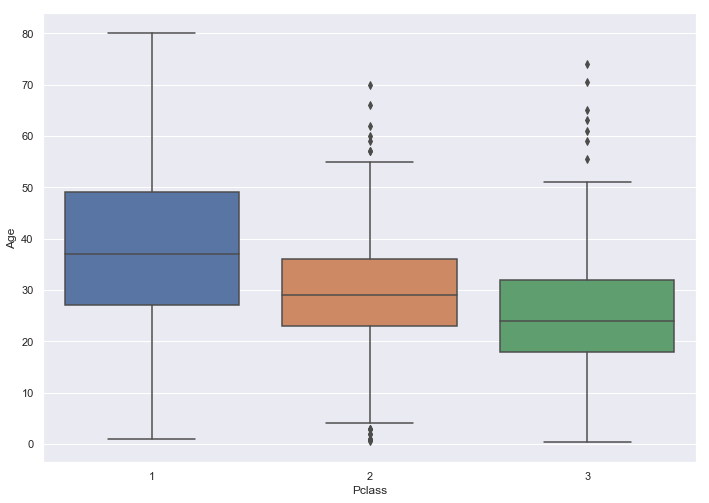

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Pclass',y='Age',data=train)

# Drop or fill null

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

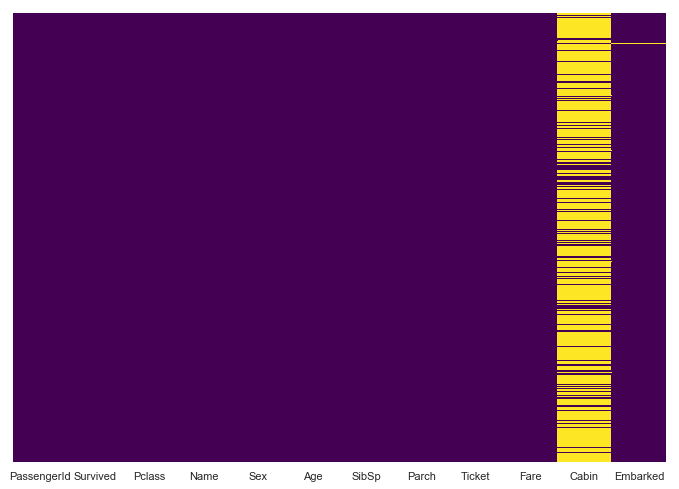

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)

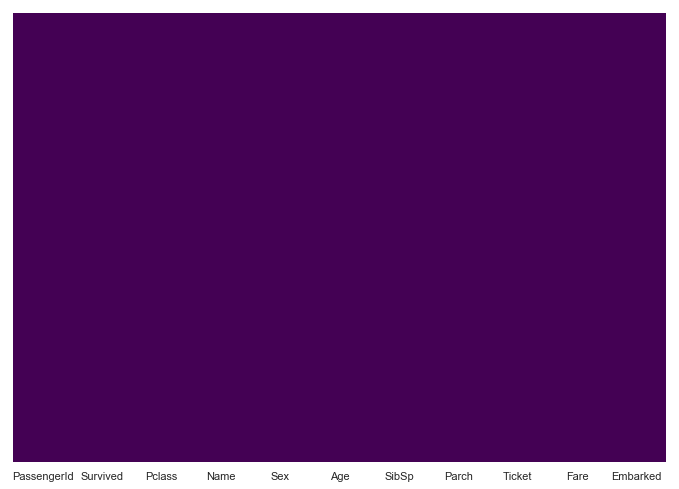

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Convert categorical

In [17]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train = pd.concat([train,sex,embark],axis=1)
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


# SK Learn #1

In [19]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel = LogisticRegression()

In [24]:
logmodel.fit(X_train,y_train)

C:\Users\bethf\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
predictions = logmodel.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



# SK Learn #2

In [170]:
def findtitle(name):
    titles = ["Mrs.","Miss.","Mr.","Dr.","Master.","Countess.","Rev.","Major.","Ms.","Col.","Mlle.","Don.","Sir.","Capt.","Lady.","Jonkheer.","Mme.","Dona."]
    string = list(name.split(' '))
    for word in string:
        if word in titles:
            if word == "Miss." or word == "Ms." or word == "Mlle.":
                return "Miss"
            elif word == "Mrs" or word == "Mme." or word == '("Mrs':
                return "Mrs."
#             elif word == "Don." or word == "Jonkheer." or word == "Sir.":
#                 return "MNoble"
#             elif word == "Countess." or word == "Lady." or word == "Dona.":
#                 return "FNoble"
#             elif word == "Dr." or word == "Master.":
#                 return "Professional"
#             elif word == "Major." or word == "Col." or word == "Capt.":
#                 return "Military"
            else:
                return word
    else:
        return name

In [174]:
file = pd.read_csv('.\\Resources\\train.csv')

train = DataFrame(file)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [175]:
train['Title'] = train['Name'].apply(findtitle)
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train['Cabin'] = train['Cabin'].map(lambda x: x[0] if pd.notnull(x) else 'U')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr.


In [176]:
train['Title'].value_counts()

Mr.          517
Miss         185
Mrs.         126
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Sir.           1
Lady.          1
Jonkheer.      1
Don.           1
Countess.      1
Capt.          1
Name: Title, dtype: int64

In [177]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
cabin = pd.get_dummies(train['Cabin'],drop_first=True)
title = pd.get_dummies(train['Title'],drop_first=True)
train = pd.concat([train,sex,embark,cabin,title],axis=1)
train.drop(['Sex','Embarked','Name','Ticket','PassengerId','T',\
            'Cabin','Title'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,B,...,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss,Mr.,Mrs.,Rev.,Sir.
0,0,3,22.0,1,0,7.2500,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [178]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S',
       'B', 'C', 'D', 'E', 'F', 'G', 'U', 'Col.', 'Countess.', 'Don.', 'Dr.',
       'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss', 'Mr.', 'Mrs.',
       'Rev.', 'Sir.'],
      dtype='object')

In [179]:
X = train.drop('Survived',axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel.fit(X_train,y_train)

C:\Users\bethf\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [180]:
predictions = logmodel.predict(X_test)

In [181]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       154
           1       0.81      0.72      0.76       114

   micro avg       0.81      0.81      0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



# Test

In [182]:
file = pd.read_csv('.\\Resources\\test.csv')

test = DataFrame(file)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [183]:
test['Title'] = test['Name'].apply(findtitle)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
test['Cabin'] = test['Cabin'].map(lambda x: x[0] if pd.notnull(x) else 'U')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U,S,Mrs.


In [184]:
test['Title'].value_counts()

Mr.        240
Miss        79
Mrs.        72
Master.     21
Rev.         2
Col.         2
Dr.          1
Dona.        1
Name: Title, dtype: int64

In [185]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
cabin = pd.get_dummies(test['Cabin'],drop_first=True)
title = pd.get_dummies(test['Title'],drop_first=True)
test = pd.concat([test,sex,embark,cabin,title],axis=1)
test.drop(['Sex','Embarked','Name','Ticket','PassengerId',\
           'Name','Cabin','Title'],axis=1,inplace=True)
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,B,C,...,F,G,U,Dona.,Dr.,Master.,Miss,Mr.,Mrs.,Rev.
0,3,34.5,0,0,7.8292,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,3,22.0,1,1,12.2875,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [186]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 'B', 'C',
       'D', 'E', 'F', 'G', 'U', 'Dona.', 'Dr.', 'Master.', 'Miss', 'Mr.',
       'Mrs.', 'Rev.'],
      dtype='object')